In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df= pd.read_csv('BlackFriday.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [5]:
del df['Product_Category_2']
del df['Product_Category_3']
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [6]:
df['User_ID'].nunique()

5891

In [7]:
df['Product_ID'].nunique()

3623

In [8]:
df['Stay_In_Current_City_Years'].nunique()

5

In [9]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [10]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [11]:
df['Purchase'].sum()

5017668378

In [12]:
 df['Purchase'].mean()

9333.859852635065

In [13]:
for column in df.columns:
    print (df[column].nunique(), "\t:", column)

5891 	: User_ID
3623 	: Product_ID
2 	: Gender
7 	: Age
21 	: Occupation
3 	: City_Category
5 	: Stay_In_Current_City_Years
2 	: Marital_Status
18 	: Product_Category_1
17959 	: Purchase


In [14]:
df['Gender'] == 'M'

0         False
1         False
2         False
3         False
4          True
          ...  
537572     True
537573     True
537574     True
537575     True
537576     True
Name: Gender, Length: 537577, dtype: bool

In [15]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


<Axes: title={'center': 'M and F'}>

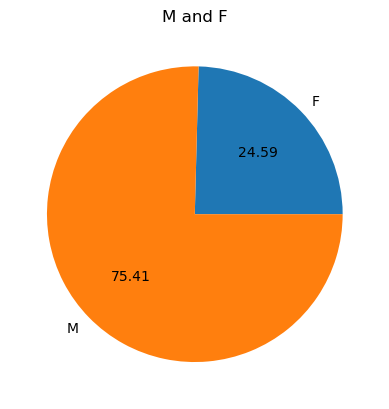

In [16]:
df.groupby('Gender').size().plot(kind = "pie", autopct="%.2f", title="M and F")

<Axes: title={'center': 'M and F'}, xlabel='Gender'>

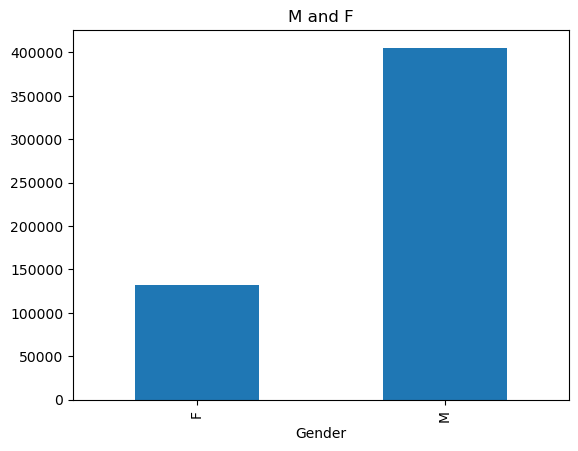

In [17]:
df.groupby('Gender').size().plot(kind = "bar", title="M and F")

<Axes: title={'center': 'Purchase Dist. by Age'}, xlabel='Age'>

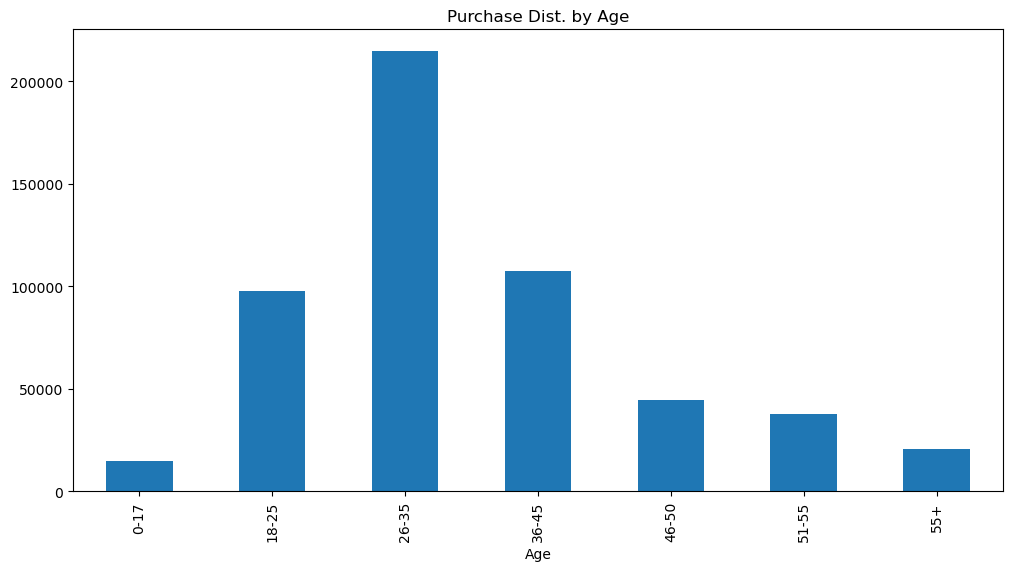

In [18]:
df.groupby('Age').size().plot(kind = "bar", figsize = (12,6), title = 'Purchase Dist. by Age')

In [19]:
lst = []
for i in df['Age'].unique():
    lst.append([i, df[df['Age'] == i]['Product_ID'].nunique()])
    
data = pd.DataFrame(lst , columns = ['Age','Products'])

<Axes: xlabel='Age'>

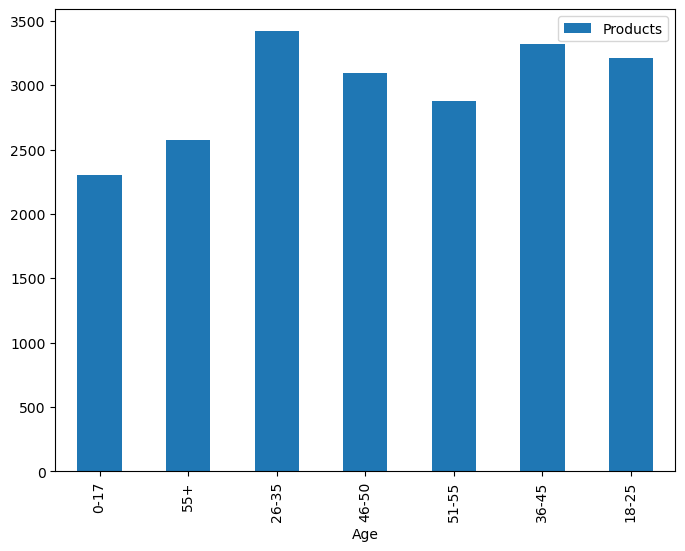

In [20]:
data.plot.bar(x = 'Age', figsize = (8,6))

<Axes: title={'center': 'Amount Spend by Age'}, xlabel='Age'>

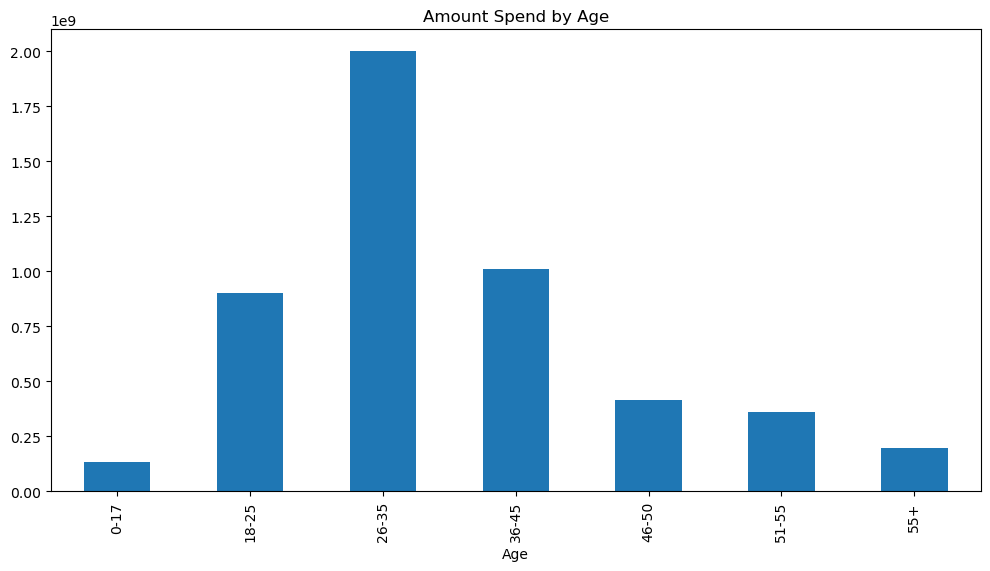

In [21]:
df.groupby('Age').sum()['Purchase'].plot(kind = 'bar', figsize = (12, 6), title = 'Amount Spend by Age')


<Axes: >

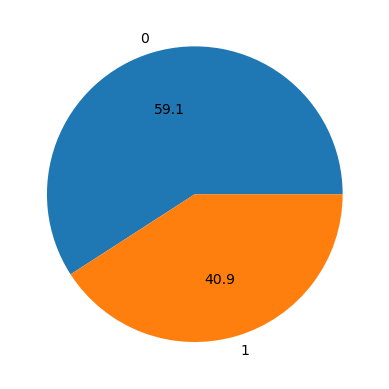

In [22]:
df.groupby('Marital_Status').size().plot(kind = 'pie', autopct = '%0.1f')


<Axes: title={'center': 'Amount Spend by Marital Status'}, xlabel='Marital_Status'>

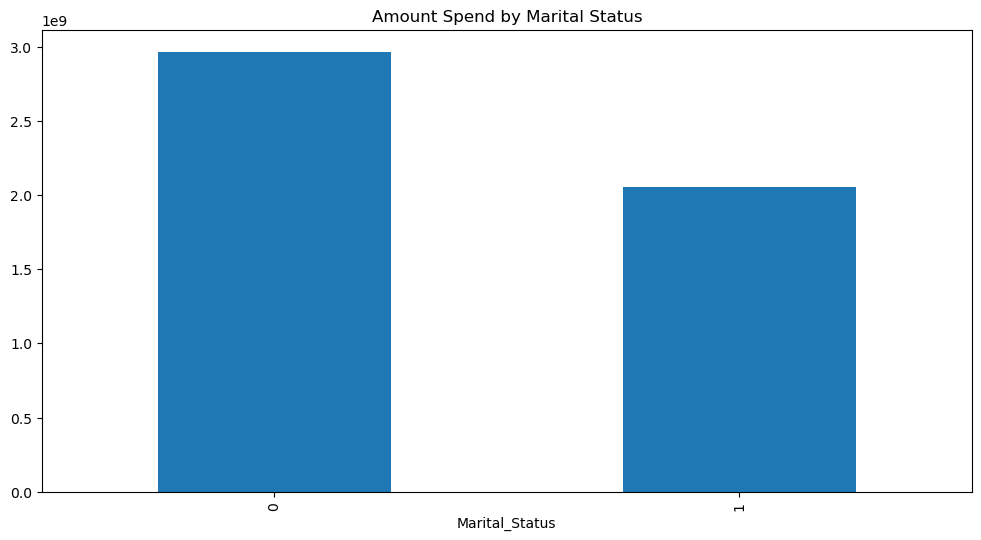

In [23]:
df.groupby('Marital_Status').sum()['Purchase'].plot(kind = 'bar', figsize = (12, 6), title = 'Amount Spend by Marital Status')


<Axes: xlabel='Age', ylabel='count'>

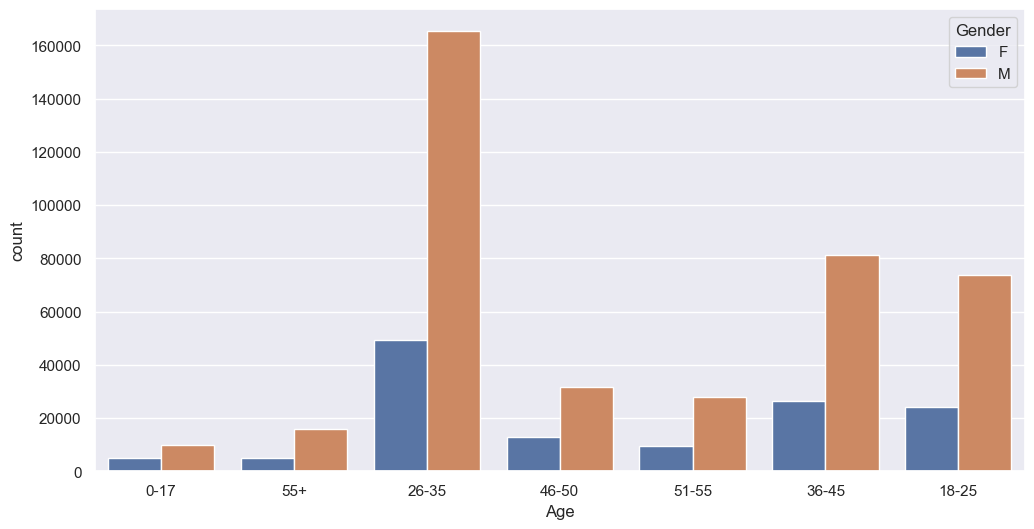

In [24]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Age', hue= 'Gender', data = df)

<Axes: xlabel='Gender', ylabel='count'>

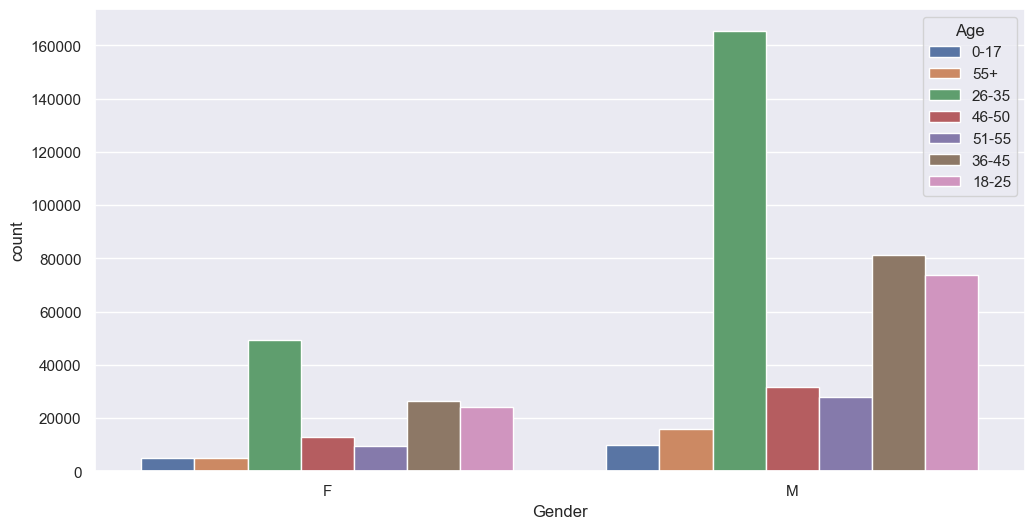

In [25]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Gender', hue= 'Age', data = df)

<Axes: xlabel='City_Category', ylabel='count'>

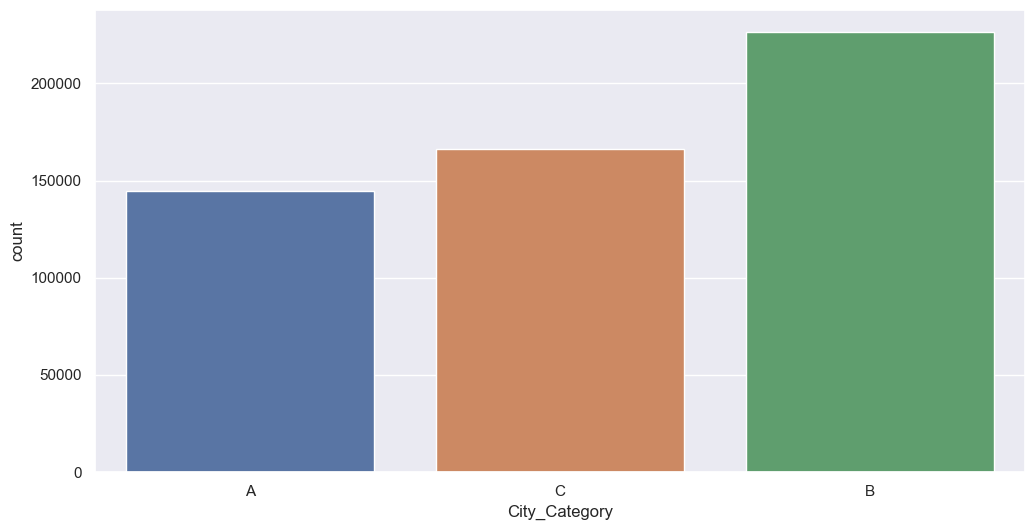

In [26]:
sns.countplot(x=df['City_Category'])

<Axes: xlabel='City_Category', ylabel='count'>

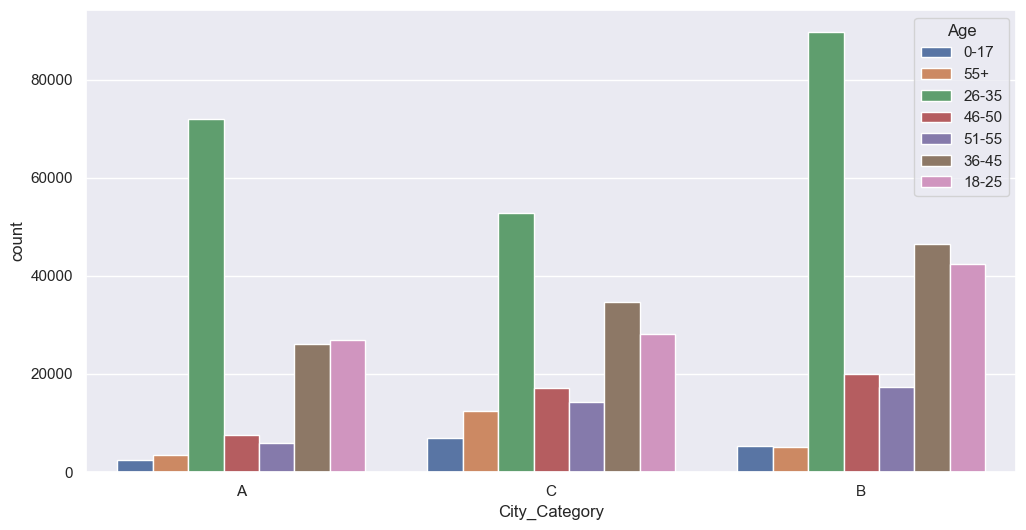

In [27]:
sns.countplot(x='City_Category', hue= 'Age', data = df)

<Axes: ylabel='Purchase'>

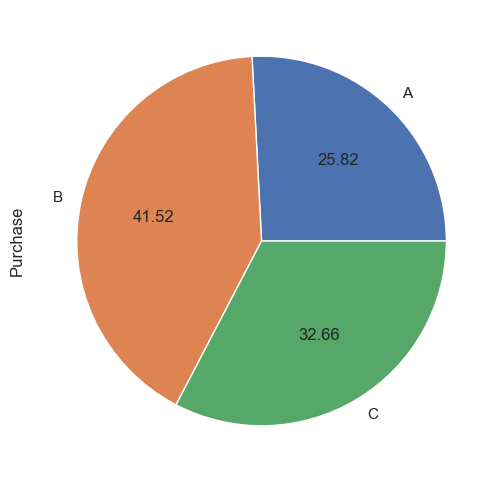

In [29]:
df.groupby('City_Category').sum()['Purchase'].plot(kind = "pie", autopct = "%.2f")

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

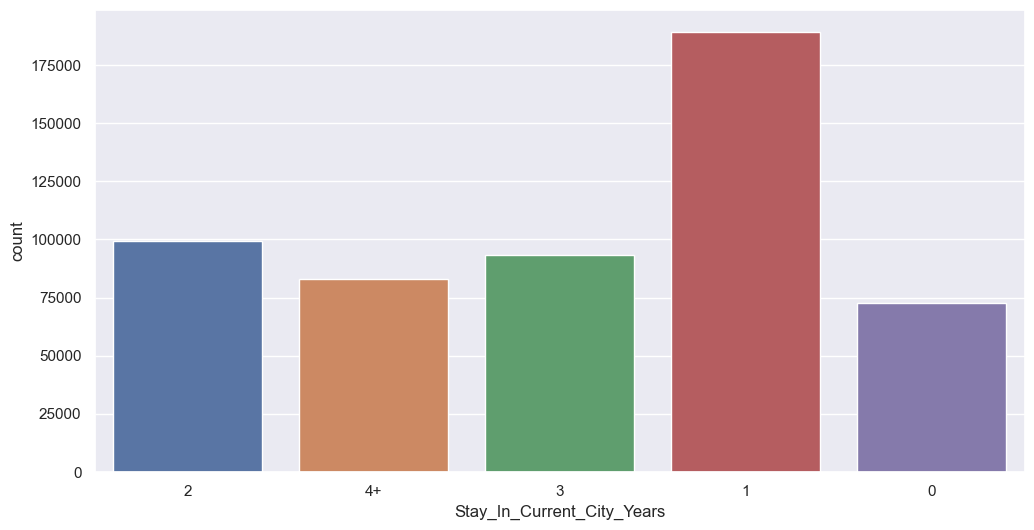

In [30]:
sns.countplot(x = df['Stay_In_Current_City_Years'])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

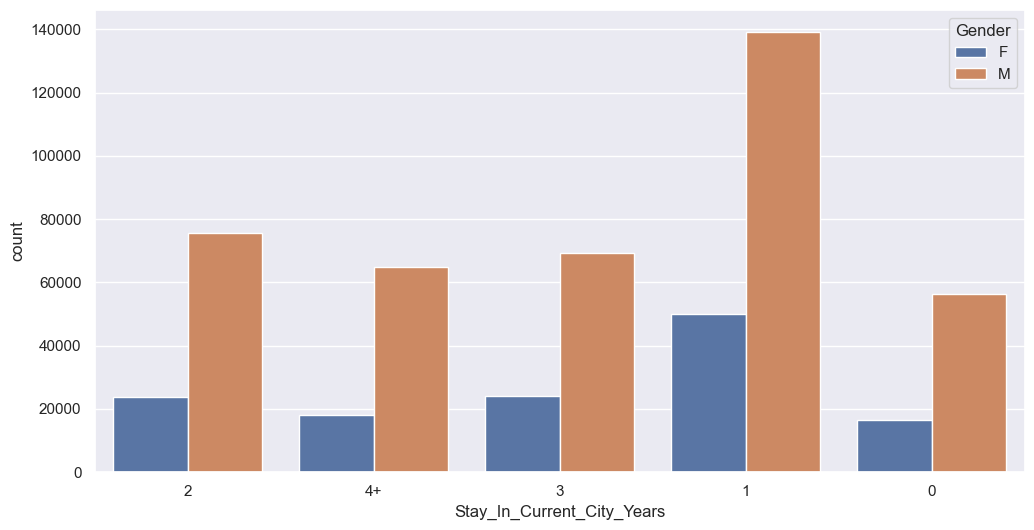

In [32]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'Gender', data =df)

<Axes: >

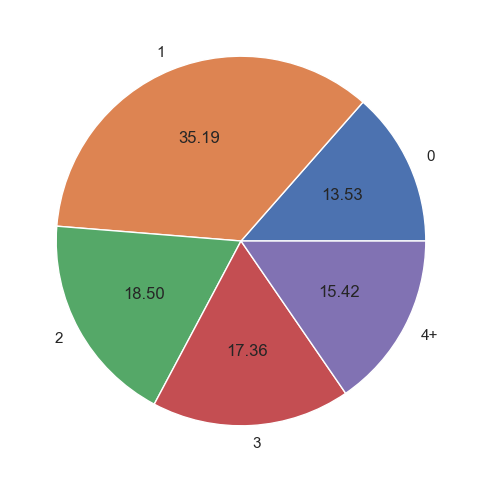

In [33]:
df.groupby('Stay_In_Current_City_Years').size().plot(kind = "pie", autopct = '%.2f')

<Axes: xlabel='Stay_In_Current_City_Years'>

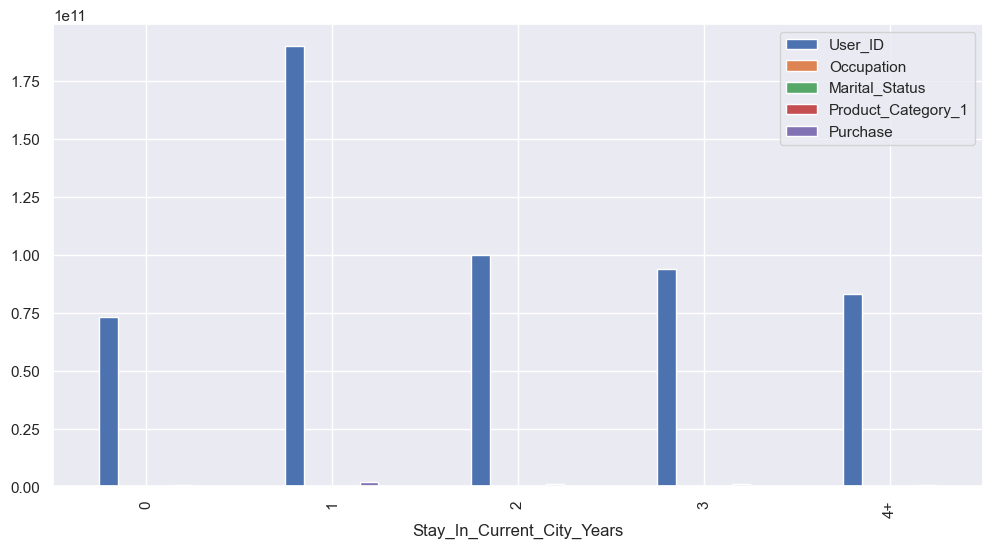

In [35]:
df.groupby('Stay_In_Current_City_Years').sum().plot(kind = "bar")

<Axes: xlabel='Occupation', ylabel='count'>

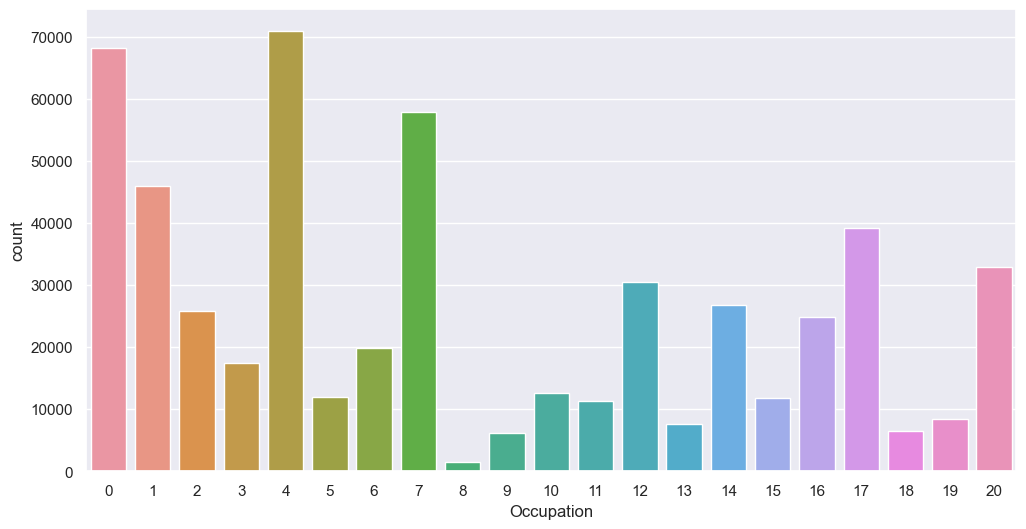

In [38]:
sns.countplot(x = df['Occupation'])

<Axes: xlabel='Occupation'>

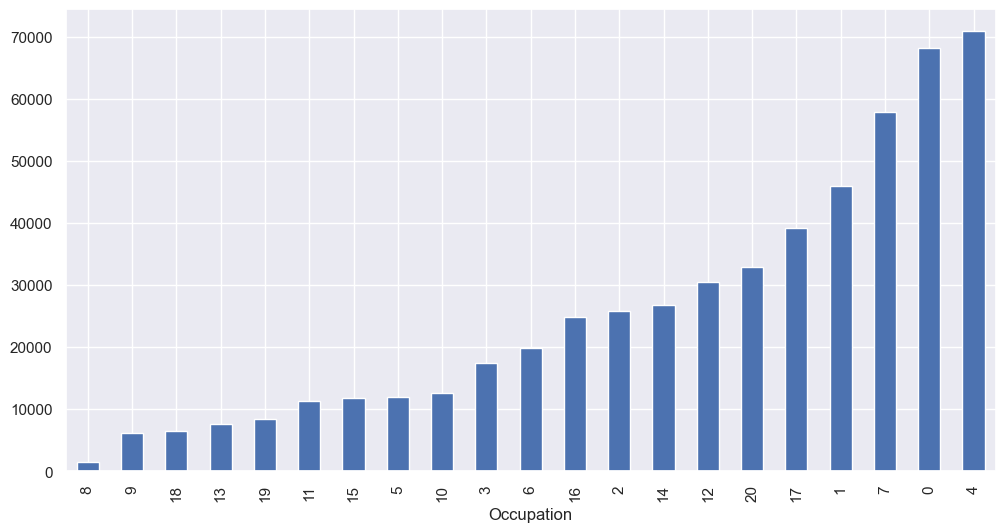

In [41]:
df.groupby('Occupation').size().sort_values().plot(kind = 'bar')

<Axes: xlabel='Occupation'>

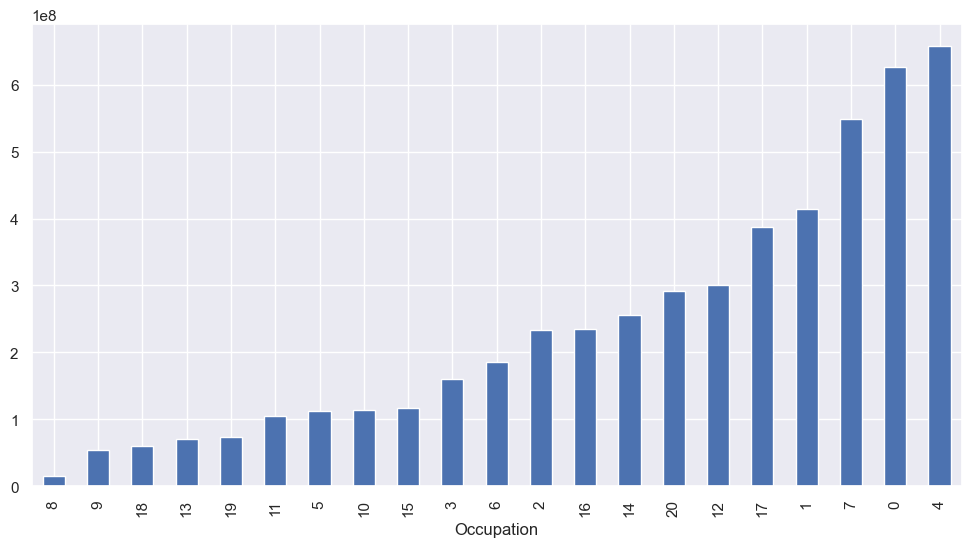

In [42]:
df.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind = 'bar')

<Axes: xlabel='Occupation', ylabel='count'>

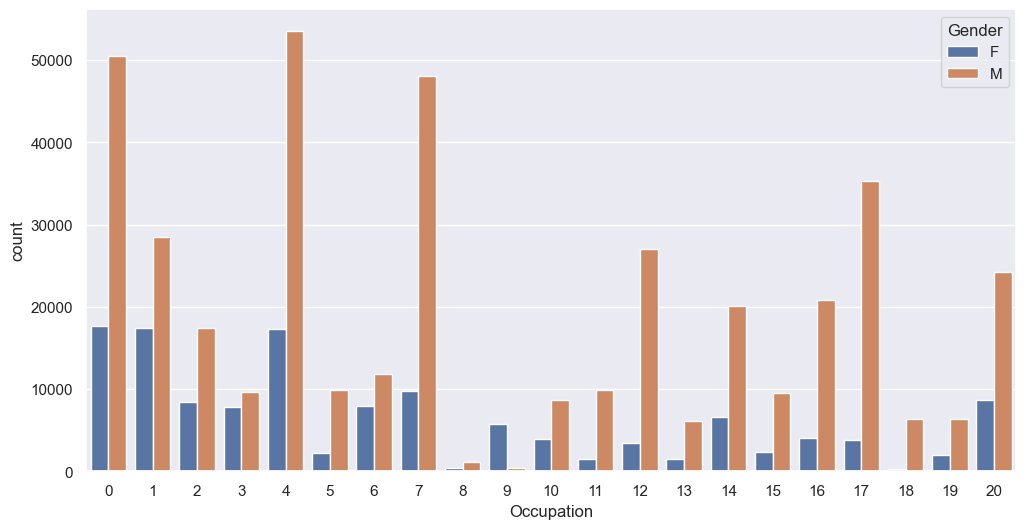

In [45]:
sns.countplot(x = 'Occupation', hue = 'Gender', data =df)

<Axes: xlabel='Occupation'>

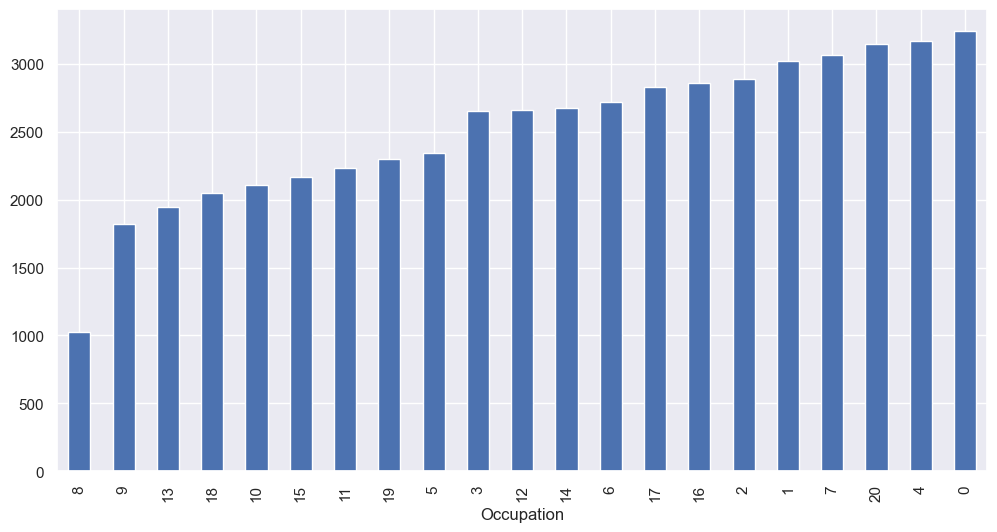

In [48]:
df.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind = 'bar')

In [49]:
df.head(1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370


<Axes: xlabel='Product_Category_1'>

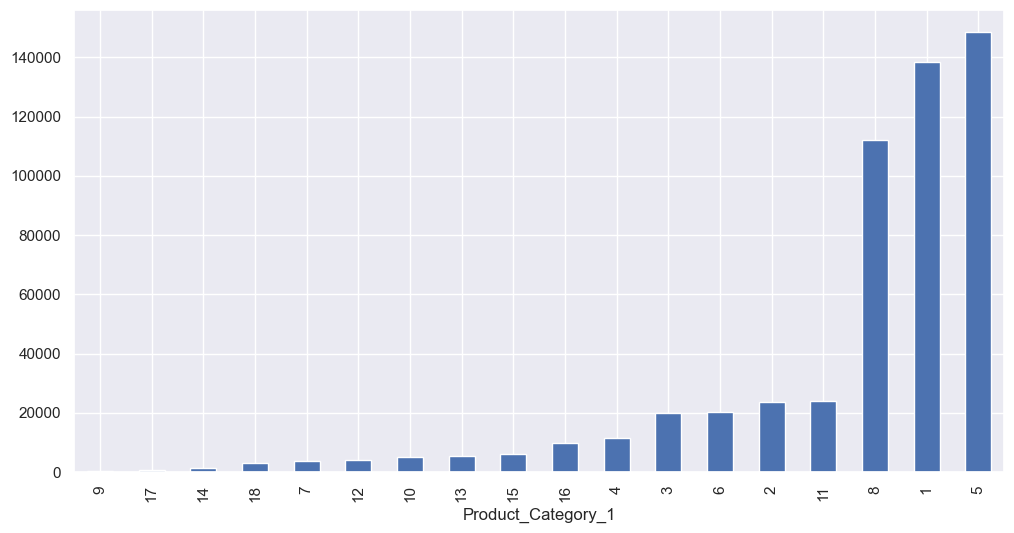

In [52]:
df.groupby('Product_Category_1').size().sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1'>

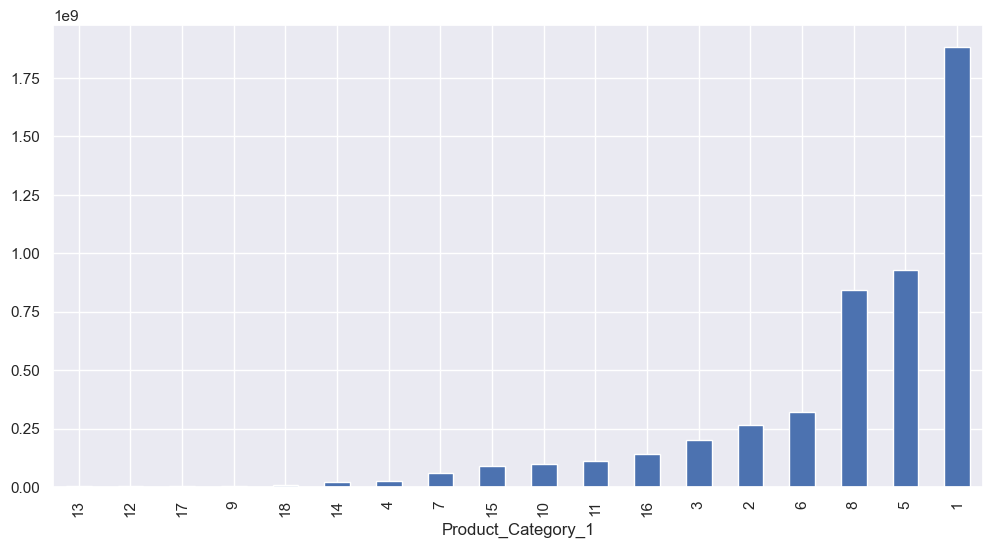

In [53]:
df.groupby('Product_Category_1').sum()['Purchase'].sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_ID'>

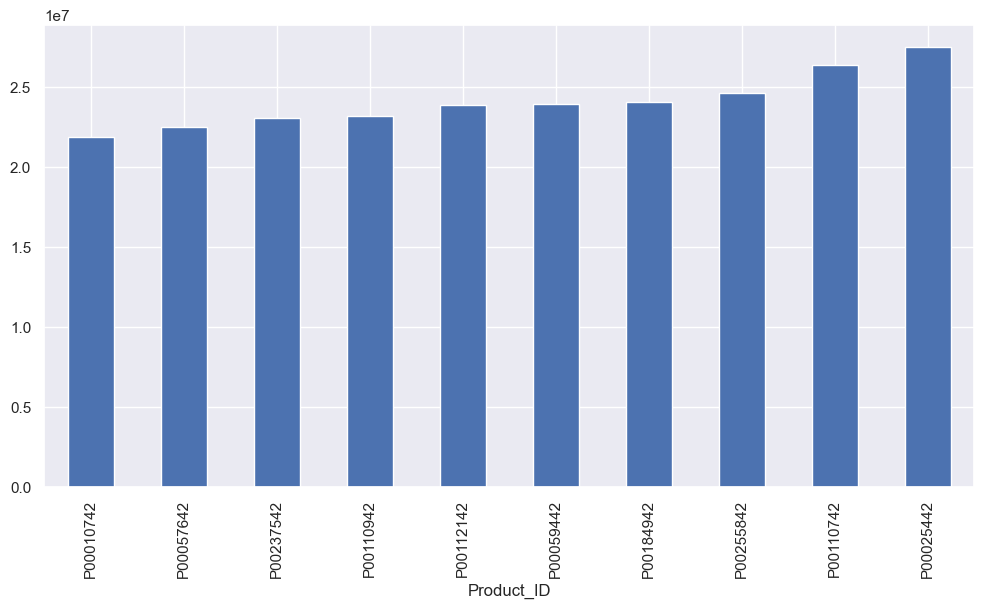

In [54]:
df.groupby('Product_ID').sum()['Purchase'].nlargest(10).sort_values().plot(kind = 'bar')

In [56]:
l = []

for i in range (len(df)):
    l.append(df['Gender'][i]+ "_" + str(df['Marital_Status'][i]))

df['MaritalGender'] = l

In [57]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,MaritalGender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


<Axes: xlabel='MaritalGender', ylabel='count'>

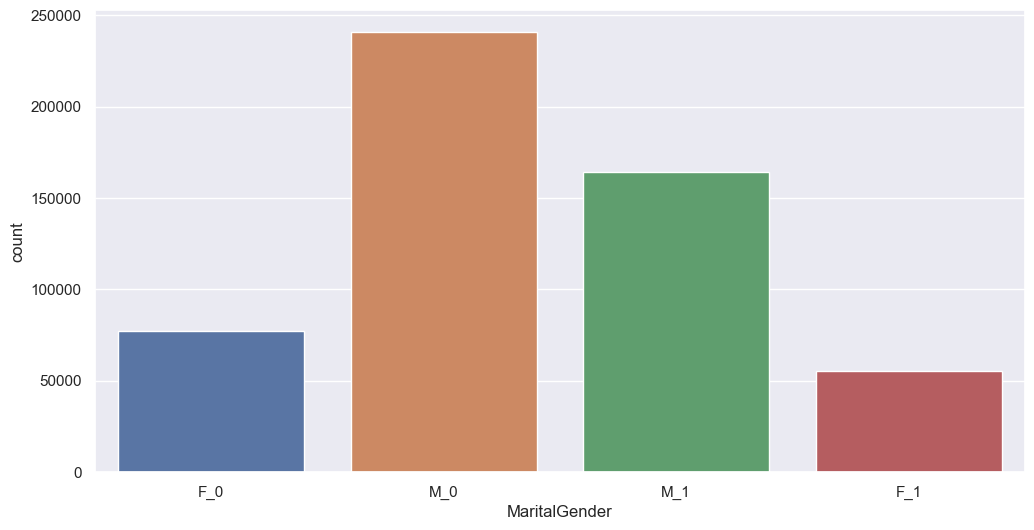

In [58]:
sns.countplot(x = df['MaritalGender'])

<Axes: xlabel='MaritalGender', ylabel='count'>

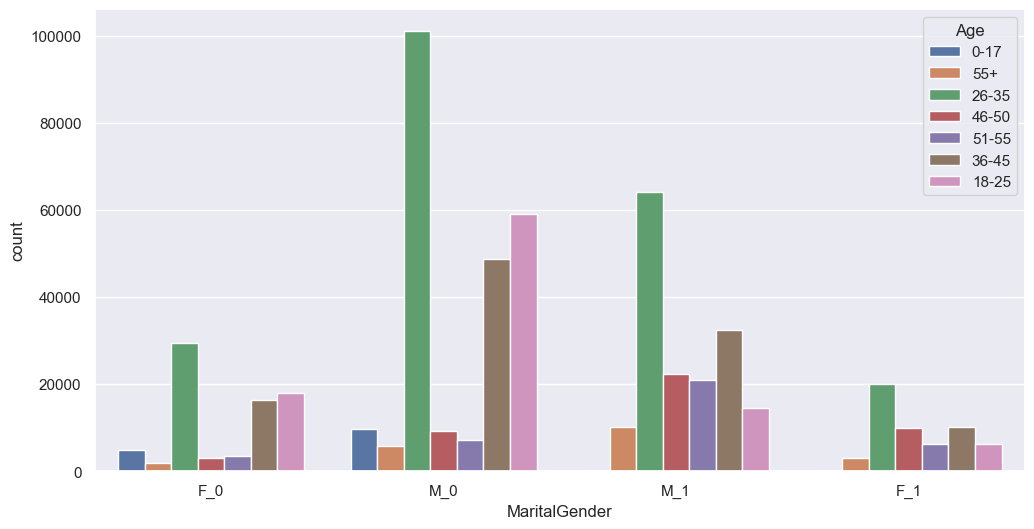

In [59]:
sns.countplot(x ='MaritalGender', hue = 'Age' , data = df)

## CONCULSION

Unmarried males tend to buy more products than any other category.